In [8]:
#  This Project is about the analysis of flight data for depatures from NYC 
# This is the path for the data set.Data set contains infrmation about all flights that departed from NYC
# Exploration ideas: Departure delays. Best airports in terms of time departure %. Aircraft speed analysis. On time arrival % analysis. Maximum number of flights headed to some particular destination.
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
from scipy.stats import norm
from pylab import rcParams
import matplotlib.patches as mpatches

%matplotlib inline


#Reading the file and Checking for missing values

In [10]:
# First set the path of the file to read

path="C:/Sanajivv/UPX_DS/Project/Project Datasets/attachment_Project_1_NYC-Flight_data/Project_1_NYC-Flight data/"

# Read the csv File

flights = pd.read_csv(path + 'flight_data.csv')

# Finding the missing value
pd.isnull(flights).values.any().sum()

print(pd.isnull(flights).sum())


flights.head()


year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [ ]:
Checking for Null Values

In [5]:
# Drop null values from the data set

len(flights[flights['dep_delay'].isnull() & flights['arr_delay'].isnull()])



8255

# There are 8255 rows where there is no data so drop them as they are of no use

In [35]:
flights.shape
print(flights.shape)

flights.dropna(subset=['dep_time', 'arr_time'], how= 'all' , inplace = True)
flights.isnull().sum()


(328521, 19)


year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time           458
sched_arr_time       0
arr_delay         1175
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time          1175
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [47]:

# Delay depature count
delay_count_dept = flights[(flights['dep_delay'] > 0)]
print ('Delay departure count: ' + str(delay_count_dept['dep_delay'].count()))
delay_count_dept


Delay departure count: 128432


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
19,2013,1,1,601.0,600,1.0,844.0,850,-6.0,B6,343,N644JB,EWR,PBI,147.0,1023,6,0,01-01-2013 06:00
25,2013,1,1,608.0,600,8.0,807.0,735,32.0,MQ,3768,N9EAMQ,EWR,ORD,139.0,719,6,0,01-01-2013 06:00
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,01-01-2013 06:00
27,2013,1,1,613.0,610,3.0,925.0,921,4.0,B6,135,N635JB,JFK,RSW,175.0,1074,6,10,01-01-2013 06:00
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,01-01-2013 06:00
41,2013,1,1,632.0,608,24.0,740.0,728,12.0,EV,4144,N13553,EWR,IAD,52.0,212,6,8,01-01-2013 06:00
47,2013,1,1,644.0,636,8.0,931.0,940,-9.0,UA,1701,N75435,EWR,FLL,151.0,1065,6,36,01-01-2013 06:00


In [15]:
# Early detapute count
early_dep = flights[(flights['dep_delay'] < 0)]
print('Early departure count : ' + str(early_dep['dep_delay'].count()))

Early departure count : 183575


In [14]:
#Flight having Max depature delay count

fl_dep_delay_count = delay_count_dept.groupby(['flight']).count()
print(fl_dep_delay_count.shape)


(3476, 18)


# Best Airport in terms of depature %

In [13]:
# Checking flights from NYC to say seattle

flights = pd.DataFrame(flights)
# NYC Airports are JFK, EWR and LGA 

#subsetting the flights from these airports to Seattle (SEA)
sea_flights = flights[((flights.origin == 'JFK') | (flights.origin == 'EWR') 
                | (flights.origin == 'LGA')) & (flights.dest == 'SEA')]
len(sea_flights)


3923

# There are 5 airlines that fly from NYC to Seattle based on our data

In [60]:
# How many airlines fly from NYC to Seattle?

print(len(sea_flights.carrier.unique()))

5


#  There were 936 unique airplanes operating between NYC and Seattle in 2013.

In [61]:
# Every plane would have a unique tail number
print(len(sea_flights.tailnum.unique())) # Calculating number of unique air planes

935


In [20]:
# Creating new data frame with number of flights grouped by NYC airport
prop = pd.DataFrame(sea_flights.groupby('origin')['origin'].count()) 
prop.columns = ['count'] # Renaming column name to count of flights
sum = prop.sum() # Total number of flights
prop['proportion'] = prop.apply(lambda count: 100*count/float(count.sum())) # percentage flights / total
prop

# Calaculating for EWR airport

flight_EWR = flights[flights.origin == 'EWR']
total_flt_EWR = len(flight_EWR)

print('Total flight departed from EWR -> '  + str(total_flt_EWR))

# On time detapute count
on_time_dep_EWR  = flight_EWR[(flight_EWR['dep_delay'] <= 0)]
total_flt_EWR_ontime = len(on_time_dep_EWR)

print('On time departure or before  : '+ str(total_flt_EWR_ontime))

## Percentage depature 

percentage_dep_ontime_EWR= (total_flt_EWR_ontime/total_flt_EWR) * 100
percentage_dep_ontime_EWR


Total flight departed from EWR -> 120835
On time departure or before  : 64885


53.69719038358092

In [21]:
# Calaculating for JFK airport

flight_JFK = flights[flights.origin == 'JFK']
total_flt_JFK = len(flight_JFK)

print('Total flight departed from JFK -> '  + str(total_flt_JFK))

# On time detapute count
on_time_dep_JFK  = flight_JFK[(flight_JFK['dep_delay'] <= 0)]
total_flt_JFK_ontime = len(on_time_dep_JFK)

print('On time departure or before  : '+ str(total_flt_JFK_ontime))

## Percentage depature 

percentage_dep_ontime_JFK = (total_flt_JFK_ontime/total_flt_JFK) * 100
percentage_dep_ontime_JFK


Total flight departed from JFK -> 111279
On time departure or before  : 67385


60.555001392895335

In [22]:
# Calaculating for LGA airport

flight_LGA =  flights[flights.origin == 'LGA']
total_flt_LGA = len(flight_LGA)

print('Total flight departed from LGA -> '  + str(total_flt_LGA))

# On time detapute count
on_time_dep_LGA  = flight_LGA[(flight_LGA['dep_delay'] <= 0)]
total_flt_LGA_ontime = len(on_time_dep_LGA)

print('On time departure or before  : '+ str(total_flt_LGA_ontime))

## Percentage depature 

percentage_dep_ontime_LGA = (total_flt_LGA_ontime/total_flt_LGA) * 100
percentage_dep_ontime_LGA

Total flight departed from LGA -> 104662
On time departure or before  : 67819


64.79811201773327

# LGA is the best  Airport in terms of depature

# Speed Analysis
#  Assuming the degree of fastness corresponds to the speed of the flight. 

In [23]:
# speed in miles for each flight

flights['speed_mph'] = flights.distance/(flights.air_time/60)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,speed_mph
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00,370.044053
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00,374.273128
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00,408.375000
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00,516.721311
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00,394.137931


Delay departure count: 128432


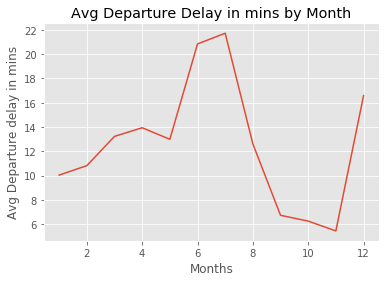

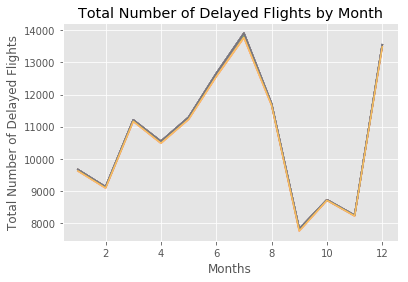

In [13]:
flights[['distance']].count()
flights[['hour']].count()

# Delay depature count
delay_count_dept = flights[(flights['dep_delay'] > 0)]
print ('Delay departure count: ' + str(delay_count_dept['dep_delay'].count()))


mpl.style.use('ggplot') 
plt.plot(flights.groupby('month')['dep_delay'].mean())
plt.xlabel('Months', size = 12)
plt.ylabel('Avg Departure delay in mins', size = 12)
plt.title('Avg Departure Delay in mins by Month')
plt.show()

# Exploring the seasonal patterns in total number of delayed by Month
plt.plot(delay_count_dept.groupby('month').count())
plt.xlabel('Months', size = 12)
plt.ylabel('Total Number of Delayed Flights', size = 12)
plt.title('Total Number of Delayed Flights by Month')
plt.show()

# On time arrival % analysis

In [32]:
# For each destination arrival
each_arrival_dest = flights.groupby('dest')['dest'].count()

# Ontime arrival on or before time
On_time_arrival = flights[flights.arr_delay <= 0]

# On time or before time arrival on echh destination
ontime_arr_each_dest = On_time_arrival.groupby('dest')['dest'].count()
print('On time Arrival for each destination -> ' + str(ontime_arr_each_dest))


# percentage on time arrival 

percentage_ontime_arrival = (ontime_arr_each_dest/each_arrival_dest)*100

percentage_ontime_arrival.head(10)


On time Arrival for each destination -> dest
ABQ      147
ACK      160
ALB      234
ANC        3
ATL     8891
AUS     1428
AVL      142
BDL      268
BGR      221
BHM      148
BNA     3348
BOS    10279
BQN      473
BTV     1492
BUF     2787
BUR      204
BWI     1021
BZN       19
CAE       19
CAK      390
CHO       27
CHS     1566
CLE     2620
CLT     7836
CMH     1895
CRW       70
CVG     2045
DAY      767
DCA     5108
DEN     3947
       ...  
PIT     1666
PSE      180
PSP       12
PVD      177
PWM     1301
RDU     4376
RIC     1150
ROC     1413
RSW     2100
SAN     1610
SAT      402
SAV      393
SBN        6
SDF      605
SEA     2616
SFO     8232
SJC      204
SJU     3588
SLC     1618
SMF      132
SNA      573
SRQ      731
STL     2323
STT      348
SYR     1032
TPA     4347
TUL      101
TVC       60
TYS      271
XNA      536
Name: dest, Length: 104, dtype: int64


dest
ABQ    57.874016
ACK    60.377358
ALB    53.302961
ANC    37.500000
ATL    51.646820
AUS    58.548585
AVL    51.636364
BDL    60.496614
BGR    58.933333
BHM    49.831650
Name: dest, dtype: float64

# Max flights headed to a particular destination

In [45]:
 # Filghts headed to a destination max
    
flight_arrival_each_dest = flights.groupby('dest')['dest'].count()

print(''+ str(flight_arrival_each_dest.sort_values()).capitalize())

Dest
lex        1
lga        1
anc        8
sbn       10
hdn       15
mtj       15
eyw       17
psp       19
jac       25
bzn       36
cho       52
myr       59
tvc      101
ilm      110
cae      116
crw      138
ege      213
mvy      221
abq      254
ack      265
avl      275
smf      284
bhm      297
oak      312
tul      315
sjc      329
okc      346
pse      365
bur      371
bgr      375
       ...  
msy     3799
sea     3923
cvg     3941
mdw     4113
stl     4339
cle     4573
phx     4656
buf     4681
iad     5700
sju     5819
las     5997
bna     6333
pbi     6554
msp     7185
iah     7198
den     7266
tpa     7466
rdu     8163
dfw     8738
dtw     9384
dca     9705
mia    11728
fll    12055
sfo    13331
clt    14064
mco    14082
bos    15508
lax    16174
atl    17215
ord    17283
name: dest, length: 105, dtype: int64


### Best destinations to fly from NYC

In [8]:
# Finding the destination flights

dest_avg = flights.groupby('dest')['dep_delay' ,'arr_delay' , 'speed_mph'].mean()
dest_avg.reset_index(level=0 ,inplace = True)
dest_avg.head()

,dest,dep_delay,arr_delay,speed_mph
0,ABQ,13.740157,4.381890,442.206348
1,ACK,6.456604,4.852273,288.953642
2,ALB,23.620525,14.397129,272.300976
3,ANC,12.875000,-2.500000,489.985945
4,ATL,12.509824,11.300113,405.182104


In [23]:
# Now make data more clean

total_flights = flights.groupby('dest').count()
total_flights.reset_index(level=0 ,inplace = True)
total_flights.head()
#total_flights.index.names = 'count'
total_flights.columns.names = ['count']
#total_flights.rename(columns = { '' :'count'}, inplace = True)
dest_avg['total_flights_count'] = total_flights.columns.names.count
total_flights.head()


count,dest,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour,speed_mph
0,ABQ,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
1,ACK,265,265,265,265,265,265,265,265,264,265,265,265,265,264,265,265,265,265,264
2,ALB,439,439,439,419,439,419,418,439,418,439,439,439,439,418,439,439,439,439,418
3,ANC,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
4,ATL,17215,17215,17215,16898,17215,16898,16873,17215,16837,17215,17215,17212,17215,16837,17215,17215,17215,17215,16837
